In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os
import glob

from matplotlib import cm
from matplotlib import font_manager, rc
%matplotlib inline

colors = cm.get_cmap('Set2')(np.arange(4))

import platform
your_os = platform.system()
if your_os == 'Linux':
    rc('font', family='NanumGothic')
elif your_os == 'Windows':
    ttf = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=ttf).get_name()
    rc('font', family=font_name)
elif your_os == 'Darwin':
    rc('font', family='AppleGothic')
rc('axes', unicode_minus=False)


## 패널 정보 

- 총 행의 수: 17553

In [41]:
panel_raw = pd.read_excel('Panel Infomation_KM.xlsx' , header = 1)
panel_device_raw = pd.read_excel('Panel Infomation_KM.xlsx' , sheet_name = 'ID matching')
panel_device = pd.DataFrame(panel_device_raw.groupby('KMID')['Device ID'].count()).reset_index()
panel_raw = pd.merge(panel_raw, panel_device, on='KMID',how='outer')

panel_raw.head(5)

,KMID,xView,App Log,eComm.,Total,SEX,BIRTH,REGION 1,REGION 2,MARRIAGE,JOB,HOUSE INCOME (MONTHLY),Device ID
0,KM00001,1.0,1.0,1.0,3,M,2000.0,서울,강서구,미혼/이혼/사별,"학생 (초중고학생, 대학생, 대학원생)","1,000만원 이상",4.0
1,KM00002,1.0,1.0,1.0,3,M,1999.0,서울,동작구,미혼/이혼/사별,"학생 (초중고학생, 대학생, 대학원생)",600~699만원,3.0
2,KM00003,1.0,1.0,1.0,3,M,1998.0,경기,고양시 덕양구,미혼/이혼/사별,"학생 (초중고학생, 대학생, 대학원생)",100~199만원,2.0
3,KM00004,1.0,1.0,1.0,3,M,1998.0,경기,남양주시,미혼/이혼/사별,"학생 (초중고학생, 대학생, 대학원생)",300~399만원,5.0
4,KM00005,1.0,1.0,1.0,3,M,1997.0,경기,용인시 기흥구,미혼/이혼/사별,"학생 (초중고학생, 대학생, 대학원생)",500~599만원,2.0


In [42]:
display(panel_device.head())

,KMID,Device ID
0,KM00001,4
1,KM00002,3
2,KM00003,2
3,KM00004,5
4,KM00005,2


#### 데이터 프레임 수

In [43]:
panel_raw.shape[0]

17553

#### null값의 비율
 - 여기에 있는 NULL값만 포함 지역 정보 中 잘못 입력된 값(0)은 반영 안됨

In [44]:
(panel_raw.isnull().sum() / panel_raw.shape[0]).mul(100).round(2) 

KMID                       0.00
xView                     81.23
App Log                    1.18
eComm.                    84.66
Total                      0.00
SEX                        2.43
BIRTH                      2.43
REGION 1                   2.43
REGION 2                   2.43
MARRIAGE                   2.43
JOB                        2.43
HOUSE INCOME (MONTHLY)     2.43
Device ID                  0.56
dtype: float64

#### KMID 별 merge 후 비교
- device ID가 없는 KMID 98건
- 1) 1건은 xview만 이용 / 추가적 정보는 25살, 경기도, 남성이라는 정보만 있음
- 2) 1건을 제외하고 나머지 97건의 데이터는 xView에 대한 이용 기록만 있고, 그이외에 정보는 null 값(없음)

In [45]:
print("device ID가 없는 KMID의 수 : {}".format(panel_raw[panel_raw['Device ID'].isnull()].shape[0]))

device ID가 없는 KMID의 수 : 98


In [46]:
panel_raw[panel_raw['Device ID'].isnull()].head(50)

,KMID,xView,App Log,eComm.,Total,SEX,BIRTH,REGION 1,REGION 2,MARRIAGE,JOB,HOUSE INCOME (MONTHLY),Device ID
4353,KM04354,1.0,NaN,NaN,1,M,1997.0,경기,0,0,0,0,NaN
17151,KM17152,1.0,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17152,KM17153,1.0,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17153,KM17154,1.0,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17155,KM17156,1.0,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17156,KM17157,1.0,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17158,KM17159,1.0,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17159,KM17160,1.0,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17162,KM17163,1.0,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17164,KM17165,1.0,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
panel_raw[panel_raw['Device ID'].isnull()].tail(48)

,KMID,xView,App Log,eComm.,Total,SEX,BIRTH,REGION 1,REGION 2,MARRIAGE,JOB,HOUSE INCOME (MONTHLY),Device ID
17213,KM17214,1.0,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17214,KM17215,1.0,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17215,KM17216,1.0,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17216,KM17217,1.0,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17217,KM17218,1.0,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17218,KM17219,1.0,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17225,KM17226,1.0,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17229,KM17230,1.0,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17240,KM17241,1.0,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17242,KM17243,1.0,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
panel = panel_raw[panel_raw['SEX'].notnull()] # 성별/ 나이대 정보가 있는 데이터만 우선 분석
panel_inf = panel.copy()

#### 1. 정보가 성별/ 나이대 정보 확인
- 성별/나이대의 null 값에 대한 index 번호 일치(같이 비교 가능)

코드: 
'''find_list = list(panel_inf[panel_inf['BIRTH'].notnull()].index) / find_list2 = list(panel_inf[panel_inf['SEX'].notnull()].index)

- 성별은 여성이 많음 / But 극단적으로 차이나지 않음(58% vs 42%)
- 패널 데이터는 20 ~ 50 대가 주를 이룸(전체 데이터 中 93%)

In [49]:
from datetime import datetime
 
standard_year = datetime.today().year  

def age_caculation(birth_year):
    age = 0 
    birth_year = int(birth_year) 
    
    if birth_year >= 2000:
        age = (standard_year - birth_year) + 1
    elif birth_year < 2000:
        age = (2000 - birth_year) + 22
    return age 

panel_inf['Age']  = panel_inf.loc[:, 'BIRTH'].agg(lambda x: age_caculation(x))
panel_inf['Age_range'] = panel_inf['Age'].map(lambda x: str((x // 10) * 10) + "대" ) 

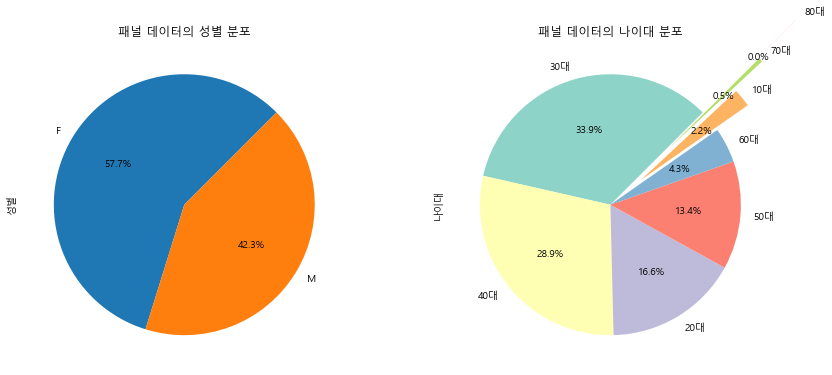

In [50]:
fig, ax = plt.subplots(1,2, figsize = (14,6))
colors2 = cm.get_cmap('Set3')(np.arange(8))

panel_inf.SEX.value_counts().plot.pie(autopct = "%.1f%%",  startangle = 45, ax = ax[0], 
                                      ylabel = "성별", title = "패널 데이터의 성별 분포")

panel_inf.Age_range.value_counts().plot.pie(autopct = "%.1f%%",  startangle = 45, ax = ax[1], colors = colors2, 
                                            explode = [0, 0, 0, 0, 0, 0.3, 0.6, 1.0],
                                            ylabel = "나이대", title = "패널 데이터의 나이대 분포")

plt.show()

#### 2. 지역 정보
- REGION 1의 정보가 0으로 잘못 기입 된 경우 1502건(8.77%) / REGION 1의 정보가 0으로 잘못 기입 된 경우 1504건(8.78%) 
- 2건의 차이는 (index번호: 3550, 4353 각각 경남, 경기 사시는 분들)

- 패널 데이터 中 거주 지역의 65.4% 수도권(서울, 경기, 인천)

In [51]:
print("지역 정보(대분류)의 잘못 기입된 건수: {}건 /  비율: {}%".format(panel_inf[panel_inf['REGION 1']==0].shape[0],
                                    round((panel_inf[panel_inf['REGION 1']==0].shape[0] / panel_inf.shape[0]) * 100, 2)))
print("지역 정보(중분류)의 잘못 기입된 건수: {}건 /  비율: {}%".format(panel_inf[panel_inf['REGION 2']==0].shape[0],
                                    round((panel_inf[panel_inf['REGION 2']==0].shape[0] / panel_inf.shape[0]) * 100, 2)))

지역 정보(대분류)의 잘못 기입된 건수: 1502건 /  비율: 8.77%
지역 정보(중분류)의 잘못 기입된 건수: 1504건 /  비율: 8.78%


In [52]:
region = panel_inf[panel_inf['REGION 2'] !=0] # 지역 정보를 활용하기 위해서 따로 정의

# 지역 정보(대분류)의 정보 다시 확인 (''가 있다는 것을 확인: 부천시 소사구(region 2)
region['REGION 1'].unique()

array(['서울', '경기', '전북', '충남', '대구', '인천', '전남', '광주', '충북', '울산', '경남',
       '경북', '부산', '대전', '강원', '제주', '`'], dtype=object)

In [53]:
display(region[region['REGION 1'] == '`'])

region.loc[region['REGION 1'] == '`',"REGION 1"] = "경기"

,KMID,xView,App Log,eComm.,Total,SEX,BIRTH,REGION 1,REGION 2,MARRIAGE,JOB,HOUSE INCOME (MONTHLY),Device ID,Age,Age_range
606,KM00607,1.0,1.0,1.0,3,M,1972.0,`,부천시 소사구,기혼,"사무직 (일반사무직, 공무원, 직업군인)",300~399만원,2.0,50,50대


C:\Users\gby1349\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


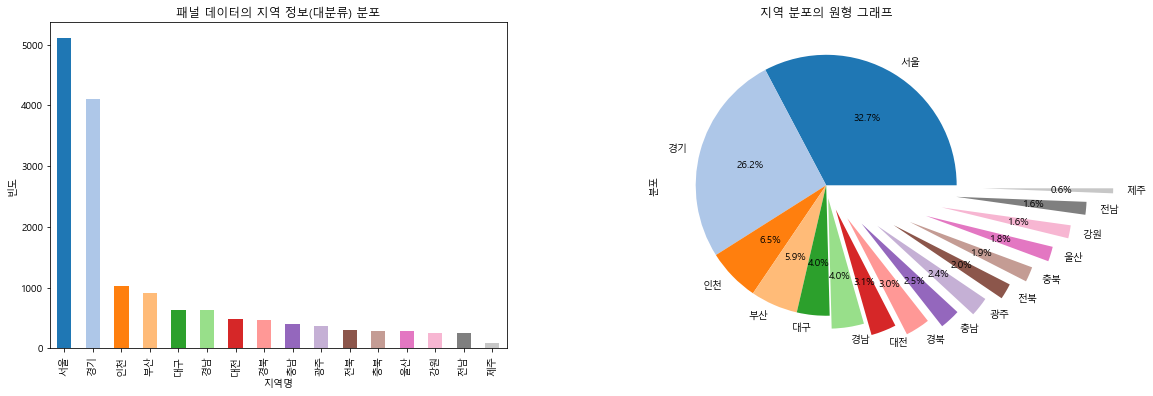

In [54]:
colors = cm.get_cmap('tab20')(np.arange(16))
explode = [0, 0, 0, 0, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.2]

fig, axes = plt.subplots(1,2, figsize=(18,6))
region['REGION 1'].value_counts().plot.bar(ax = axes[0], color = colors ,title = "패널 데이터의 지역 정보(대분류) 분포",)
axes[0].set_xlabel('지역명')
axes[0].set_ylabel('빈도')

region['REGION 1'].value_counts().plot.pie(autopct = "%.1f%%", colors=colors, startangle = 0, 
                                          explode = explode, title = "지역 분포의 원형 그래프", ylabel = "분포")

plt.show()

#### 미세먼지 측정소 안에 해당 지역들이 있는 지 확인
- 패널 데이터 의 거주 지역과 비교 해서 미세먼지 측정소가 없는 지역명(수도권은 없어도 크게 무관할 듯)
 >> ['군위군', '당진군', '문경시', '성주군', '여주군', '연기군', '영양군', '예천군', '청도군', '청송군', '청원군']
 
 경상북도: 군위군 / 문경시 / 성주군 / 영양군 / 예천군 / 청도군 / 청송군
 충정남도: 당진군 / 연기군
 충정북도: 청원군
 경기도: 여주군

In [55]:
input_file = r'C:\Users\gby1349\python\논문작성\미세먼지'
dust_file = glob.glob(os.path.join(input_file, '2019_10_미세먼지.xlsx'))

tmp_raw = []

for file_name in dust_file:
    tmp = pd.read_excel(file_name)
    tmp_raw.append(tmp)
    
dust_raw = pd.concat(tmp_raw)
dust_raw['지역_중분류'] = dust_raw['지역'].agg(lambda x: x.split()[1])
dust_raw['지역_대분류'] = dust_raw['지역'].agg(lambda x: x.split()[0])

In [56]:
panel_region = sorted(list(region['REGION 2'].agg(lambda x: x.split()[0]).unique()))
dust_region = sorted(list(dust_raw['지역_중분류'].unique()))

region_bool = []
for i in panel_region:
    if i not in dust_region:
        region_bool.append(False)
    else: 
        region_bool.append(True)

In [57]:
find = pd.DataFrame({'region_02' : panel_region, 'Bool' : region_bool})
only_panel_region = list(find.query('Bool == False')['region_02'].unique()); only_panel_region 

['군위군', '당진군', '문경시', '성주군', '여주군', '연기군', '영양군', '예천군', '청도군', '청송군', '청원군']

In [58]:
find.shape

(201, 2)

\#### 결혼 여부
- 결혼에 대해서 잘못 기입(0)으로 된 건수 1894건 / 12%정도며, 앞에 있었던 지역 정보의 잘못된 기입과는 항상 일치하는 것은 아님

1. 전반적인 기혼과 미혼 비율은 유의미하지 않게 차이가 발생하지 않는다.
2. 이는 성별별로도 동일한 결과
3. 하지만 나이대는 차이가 뚜렷하다.(우리가 예상한 것처럼)
>> 10,20대는 기혼의 경우가 매우 작지만, 40~60대의 기혼의 경우가 대부분이다. (70대 이후에는 데이터가 적어 좋은 표본으로 삼기 어렵다 판단)

In [59]:
print("직업정보를 잘못 기입된 건수: {}건 /  비율: {}%".format(panel_inf[panel_inf['MARRIAGE']==0].shape[0],
                                    round((panel_inf[panel_inf['MARRIAGE']==0].shape[0] / panel_inf.shape[0]) * 100, 2)))

marry = panel_inf[panel_inf['MARRIAGE'] !=0]

직업정보를 잘못 기입된 건수: 1894건 /  비율: 11.06%


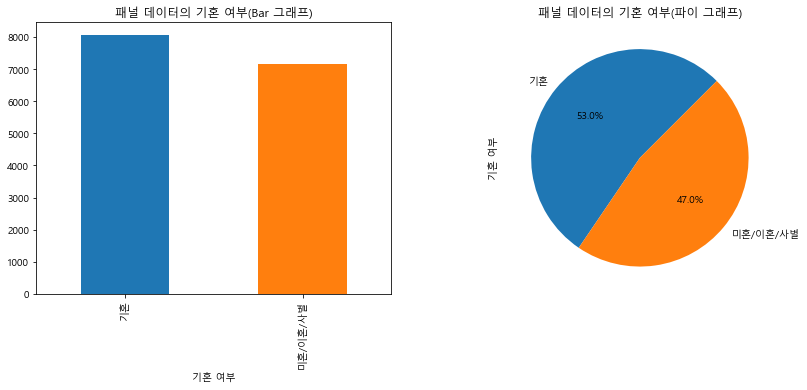

In [60]:
fig, ax = plt.subplots(1,2 , figsize = (14,5))

colors = cm.get_cmap('tab10')(np.arange(2))
marry['MARRIAGE'].value_counts().plot.bar(ax = ax[0], title = "패널 데이터의 기혼 여부(Bar 그래프)", xlabel = "기혼 여부", color = colors)

marry['MARRIAGE'].value_counts().plot.pie(autopct = "%.1f%%",  startangle = 45, ax = ax[1], colors = colors,
                                          ylabel = "기혼 여부", title = "패널 데이터의 기혼 여부(파이 그래프)")
plt.show()

In [61]:
marry_by_sex = marry.pivot_table(index = "SEX", columns = "MARRIAGE", values = 'JOB', aggfunc = np.size, margins = True)
marry_by_sex  = marry_by_sex.divide(marry_by_sex['All'], axis =0)

marry_by_age = marry.pivot_table(index = "Age_range", columns = "MARRIAGE", values = 'JOB', 
                                 aggfunc = np.size, fill_value = 0, margins = True)
display(marry_by_age)
marry_by_age = marry_by_age.divide(marry_by_age['All'], axis = 0)

MARRIAGE,기혼,미혼/이혼/사별,All
Age_range,,,
10대,10,262,272
20대,105,2318,2423
30대,2220,3031,5251
40대,3314,1225,4539
50대,1747,277,2024
60대,602,40,642
70대,69,6,75
80대,7,0,7
All,8074,7159,15233


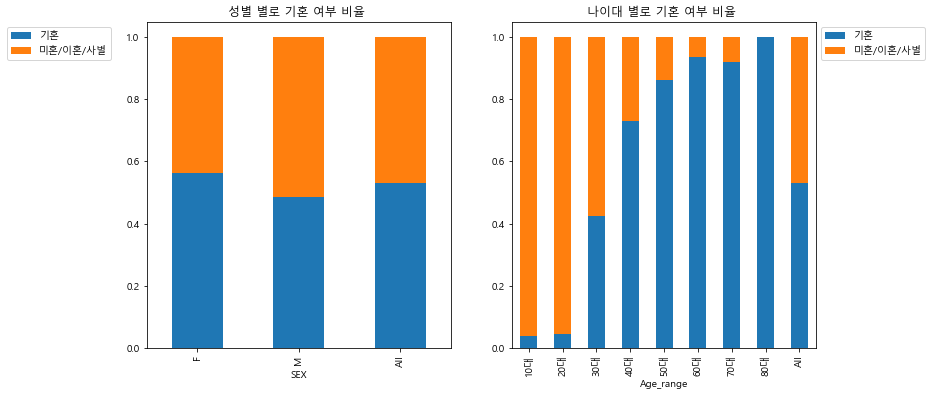

In [62]:
fig, axes = plt.subplots(1,2, figsize = (12,6))
marry_by_sex.iloc[:,:-1].plot.bar(ax= axes[0], title = "성별 별로 기혼 여부 비율 ", stacked = True)
axes[0].legend(bbox_to_anchor=(-0.1, 1.0))

marry_by_age.iloc[:,:-1].plot.bar(ax= axes[1], title = "나이대 별로 기혼 여부 비율 ", stacked = True)
axes[1].legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

#### 직장 구분
- 직업 정보를 0으로 잘못기입된 건수 2479건 / 비율(성별, 연령대의 NULL 값제외한 데이터)의 약 14.47%이다

In [63]:
print("직업정보를 잘못 기입된 건수: {}건 /  비율: {}%".format(panel_inf[panel_inf['JOB']==0].shape[0],
                                    round((panel_inf[panel_inf['JOB']==0].shape[0] / panel_inf.shape[0]) * 100, 2)))

job = panel_inf[panel_inf['JOB'] !=0]

직업정보를 잘못 기입된 건수: 2479건 /  비율: 14.47%


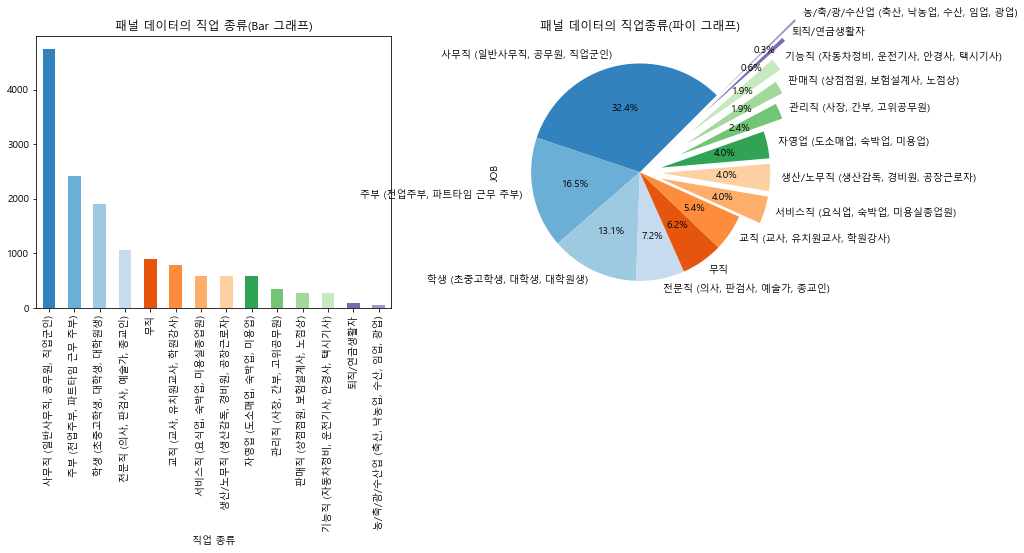

In [64]:
fig, ax = plt.subplots(1,2 , figsize = (14,5))

explode = [0, 0, 0, 0, 0, 0, 0.2, 0.2, 0.2, 0.4, 0.5, 0.6, 0.8, 1.0]
colors = cm.get_cmap('tab20c')(np.arange(15))

job['JOB'].value_counts().plot.bar(ax = ax[0], title = "패널 데이터의 직업 종류(Bar 그래프)", xlabel = "직업 종류", color = colors)
job['JOB'].value_counts().plot.pie(autopct = "%.1f%%",  startangle = 45, ax = ax[1], colors = colors, explode = explode,
                                   title = "패널 데이터의 직업종류(파이 그래프)")
plt.show()

#### 가계 소득 
- 가계 소득을 0으로 잘못기입된 건수 1975건 / 비율(성별, 연령대의 NULL 값제외한 데이터)의 약 11.53%이다

In [65]:
print("직업정보를 잘못 기입된 건수: {}건 /  비율: {}%".format(panel_inf[panel_inf['HOUSE INCOME (MONTHLY)']==0].shape[0],
                                    round((panel_inf[panel_inf['HOUSE INCOME (MONTHLY)']==0].shape[0] / panel_inf.shape[0]) * 100, 2)))

house_income = panel_inf[panel_inf['HOUSE INCOME (MONTHLY)'] !=0]

직업정보를 잘못 기입된 건수: 1975건 /  비율: 11.53%


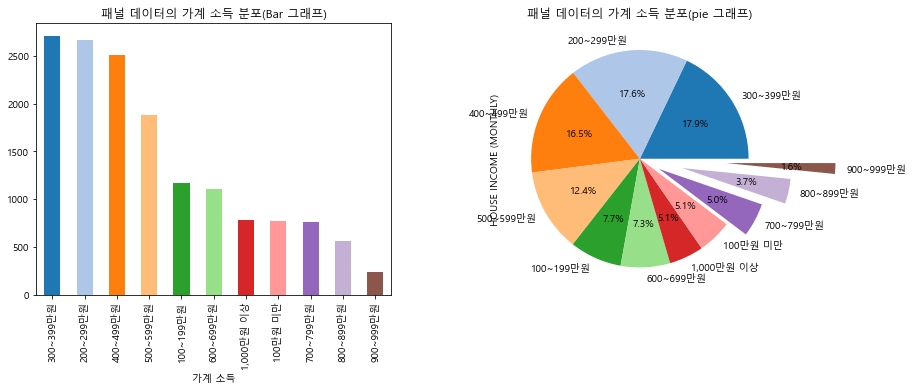

In [66]:
fig, ax = plt.subplots(1,2 , figsize = (14,5))

colors = cm.get_cmap('tab20')(np.arange(11))
explode = [0, 0, 0, 0, 0, 0, 0, 0, 0.2, 0.4, 0.8]

house_income['HOUSE INCOME (MONTHLY)'].value_counts().plot.bar(ax = ax[0], title = "패널 데이터의 가계 소득 분포(Bar 그래프)", 
                                                               color = colors, xlabel = "가계 소득")

house_income['HOUSE INCOME (MONTHLY)'].value_counts().plot.pie(autopct = "%.1f%%",  startangle = 0, ax = ax[1], colors = colors,
                                                               explode = explode, title = "패널 데이터의 가계 소득 분포(pie 그래프)")
plt.show()

#### 앱 패널 

- 앱 패널 데이터 자체(그 이외의 열에 null 값 0을 제외하고)의 3가지 접속 비율(xview, applog, ecoom)
- 2개 접속한 사람들의 선택  >> xview: 63.9% (948건) / App Log 99% (1478건) / eComm. 36.5% (542명)

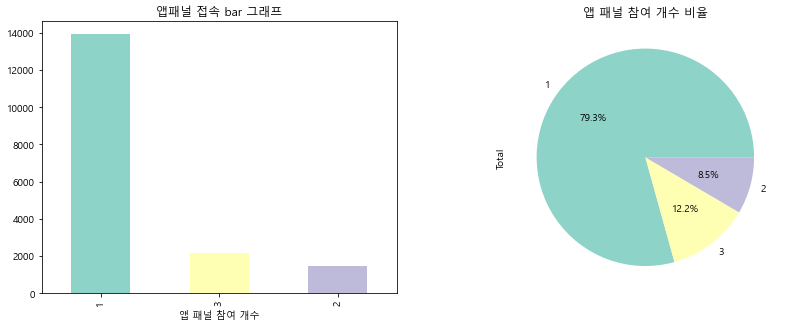

In [67]:
fig, ax = plt.subplots(1, 2, figsize = (14,5))

colors = cm.get_cmap('Set3')(np.arange(3))
panel_raw.Total.value_counts().plot.bar(ax = ax[0], title = "앱패널 접속 bar 그래프", xlabel = "앱 패널 참여 개수", color = colors)

panel_raw.Total.value_counts().plot.pie(autopct = "%.1f%%",  startangle = 0, 
                                        title = "앱 패널 참여 개수 비율", ax = ax[1], colors = colors )
plt.show()

- 성별 나이대 정보를 바탕으로 앱 패널 활동 참여
1. 성별의 차이가 크게 없음
2. 40 ~ 50 대의 패널 수가 확실히 다름

In [68]:
panel_table_sex = panel_inf.pivot_table(index = 'SEX', columns = 'Total', values = 'BIRTH', aggfunc = np.size , margins = True)
panel_ratio_sex = panel_table_sex.divide(panel_table_sex['All'], axis = 0).iloc[:-1, :-1]

display(panel_table_sex)
panel_table_age = panel_inf.pivot_table(index = 'Age_range', columns = 'Total', values = 'BIRTH',
                                        aggfunc = np.size, fill_value = 0, margins = True )
panel_ratio_age = panel_table_age.divide(panel_table_age['All'], axis = 0).iloc[:-1, :-1]

display(panel_table_age)

Total,1,2,3,All
SEX,,,,
F,7761.0,816.0,1304.0,9881.0
M,5759.0,653.0,834.0,7246.0
All,13520.0,1469.0,2138.0,17127.0


Total,1,2,3,All
Age_range,,,,
10대,384,0,0,384.0
20대,2451,188,205,2844.0
30대,4629,437,747,5813.0
40대,3722,453,782,4957.0
50대,1625,307,361,2293.0
60대,618,83,42,743.0
70대,85,1,0,86.0
80대,6,0,1,7.0
All,13520,1469,2138,17127.0


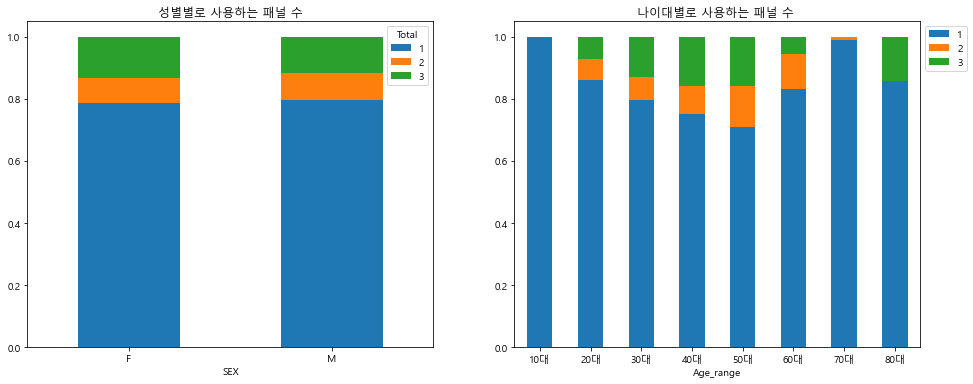

In [69]:
fig, axes = plt.subplots(1,2, figsize = (16,6))
panel_ratio_sex.plot.bar(ax = axes[0], stacked = True, rot = 0, title = "성별별로 사용하는 패널 수")
panel_ratio_age.plot.bar(ax = axes[1], stacked = True, rot = 0, title = "나이대별로 사용하는 패널 수 ")
axes[1].legend(bbox_to_anchor = (1.0, 1.0))
plt.show()

#### device 관련 내용
- 나이/성별이 있는 데이터에 대한 device의 수(null값 1개) >> 1개로 대체(큰 문제가 없을 것이라 판단)

In [70]:
panel_inf['Device ID'] = panel_inf['Device ID'].fillna(1)

#### device ID 개수 비율
- 앞도적으로 1개를 갖고 있는 비율이 높음(57.4%)

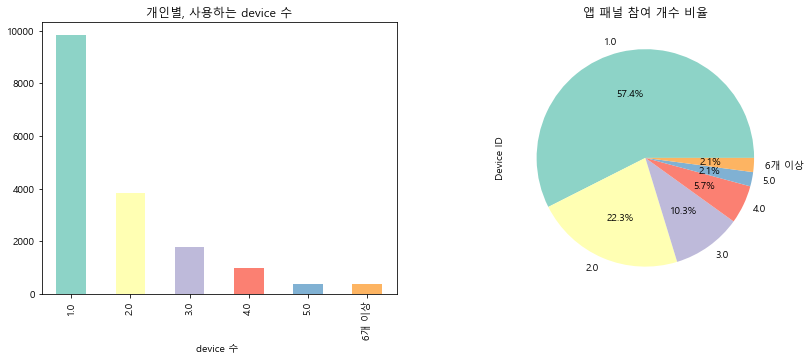

In [71]:
fig, ax = plt.subplots(1, 2, figsize = (14,5))

colors = cm.get_cmap('Set3')(np.arange(6))
panel_inf['Device ID'].agg(lambda x: x if x <= 5 else '6개 이상').value_counts().plot.bar(ax = ax[0], 
                                               title = "개인별, 사용하는 device 수", xlabel = "device 수 ", color = colors)

panel_inf['Device ID'].agg(lambda x: x if x <= 5 else '6개 이상').value_counts().plot.pie(autopct = "%.1f%%",  startangle = 0, 
                                        title = "앱 패널 참여 개수 비율", ax = ax[1], colors = colors )
plt.show()

#### Device 6개 이상인 경우: 

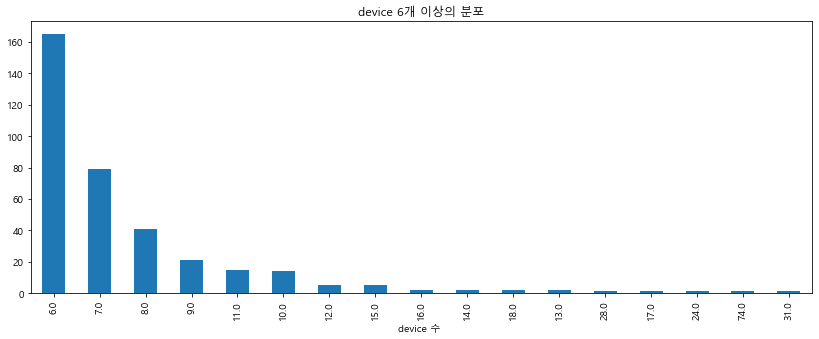

In [89]:
fig, ax = plt.subplots(figsize = (14,5))

panel_inf[panel_inf['Device ID']>=6].loc[:,"Device ID"].value_counts().plot.bar(ax = ax,
                                                                               title = "device 6개 이상의 분포", xlabel = "device 수 ")
plt.show()

### Device 사용개수별 분포 확인
- device를 2개 이상 가지고 사용한 사용자들의 분포가 40대, 50대가 눈의 띄게 증가 / 20대는 감소

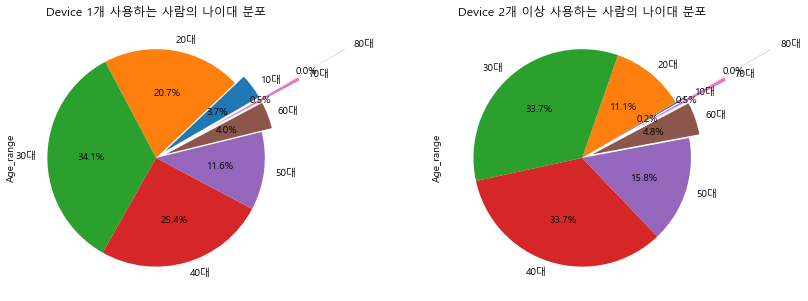

In [116]:
fig, ax = plt.subplots(1, 2, figsize = (14,5))
explode =[0.1, 0, 0, 0, 0, 0.1, 0.5, 1.0]

panel_inf[panel_inf['Device ID'] == 1].Age_range.value_counts().reindex(['10대','20대','30대','40대','50대','60대','70대','80대']).plot.pie(autopct = "%.1f%%",  startangle = 30, 
                                        title = "Device 1개 사용하는 사람의 나이대 분포", ax = ax[0], explode = explode)

panel_inf[panel_inf['Device ID'] >= 2].Age_range.value_counts().reindex(['10대','20대','30대','40대','50대','60대','70대','80대']).plot.pie(autopct = "%.1f%%",  startangle = 30, 
                                        title = "Device 2개 이상 사용하는 사람의 나이대 분포", ax = ax[1], explode = explode)
plt.show()